# Алексей Сек, БЭК182

## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принимающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решении задействуйте np.reshape и/или np.newaxis.

In [209]:
# Импортируем библиотеку для выполнения задания
import numpy as np

In [210]:
def Vandermont(x):
    '''Данная функция принимает на вход одномерный вектор x типа ndarray из числовых значений, 
    а на выходе выдает матрицу Вандермонда'''

# Идея в том, чтобы можно было реплицировать вектор без использования циклов, позже вернем в numpy формат
    x = list(x)

# N - длина нашего вектора (изначально это список, а не вектор)
    N = len(x)
    
# Нам нужна матрица размерности N*N, а не вектор 1*N, поэтому продублируем список N раз
    x = x * N
    
# Превращаем список в ndarray (одномерный вектор-строку размерности 1*N^2)
    x = np.array(x)

# Делаем из одномерной длинной вектора-строки матрицу N*N
# Важно выбрать правильный порядок (order) для метода np.reshape(),
# чтобы при возведении в вектор степеней вышла именно матрица Вандермонда
    x = x.reshape(N, N, order='F')

# Возводим матрицу N*N в вектор степеней от 0 до N-1
    x = x[:, np.newaxis] ** np.arange(N)
    return x

In [212]:
x = np.array([5, 2, 3, 4, 5, 6])
print(Vandermont(x))

[[[   1    5   25  125  625 3125]]

 [[   1    2    4    8   16   32]]

 [[   1    3    9   27   81  243]]

 [[   1    4   16   64  256 1024]]

 [[   1    5   25  125  625 3125]]

 [[   1    6   36  216 1296 7776]]]


## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

### 2. Марафон. Задача 1

In [2]:
# Импортируем библиотеки для выполнения задания
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [172]:
# Пусть количество часов марафона равно 10, т.к. нет других предпосылок
N = 10

# Создадим пустую матрицу
matrix = np.array([])

# Создадим зерно распределения
np.random.seed(18)

# Сгенерируем то, сколько каждый игрок пройдет за каждый час в каждом марафоне
Winnie = np.random.exponential(1, size=N*(10**4))
Pyatochok = np.random.normal(1, 1, size=N*(10**4))
Krolik = np.random.poisson(1, size=N*(10**4))
Iaia = np.random.binomial(n=2, p=0.5, size=N*(10**4))

# Добавим все распределения в один массив, а затем изменим размерность до нужной нам:
# Все наблюдения за N часов в каждом из 10**4 марафонов по 4 участникам
matrix = np.concatenate((Winnie, Pyatochok, Krolik, Iaia))
matrix = matrix.reshape(10**4, N, 4, order='F')

# Посмотрим сгенерированные случайные величины
print(Winnie)
print(Pyatochok)
print(Krolik)
print(Iaia)

# Проверим, верно ли мы выбрали размерность матрицы
print(matrix[:2])

[1.05089196 0.70411384 2.10867652 ... 0.30091113 1.20843655 0.25121563]
[0.3893287  0.00459266 1.36742418 ... 0.51540274 1.313093   1.9475747 ]
[2 0 2 ... 1 0 0]
[2 1 1 ... 1 1 0]
[[[ 1.05089196e+00  3.89328702e-01  2.00000000e+00  2.00000000e+00]
  [ 3.08555039e-01 -2.87584594e-01  0.00000000e+00  1.00000000e+00]
  [ 2.02586282e-01  4.28288397e-01  2.00000000e+00  2.00000000e+00]
  [ 4.95256158e+00 -9.89987830e-01  1.00000000e+00  2.00000000e+00]
  [ 1.16375677e-01  1.35745462e+00  1.00000000e+00  0.00000000e+00]
  [ 1.03216628e-01 -3.62590711e-01  1.00000000e+00  0.00000000e+00]
  [ 3.43245291e-01  1.55616920e+00  0.00000000e+00  1.00000000e+00]
  [ 5.63477315e-01  1.32660621e+00  1.00000000e+00  2.00000000e+00]
  [ 1.05025589e+00  2.10393763e-01  2.00000000e+00  1.00000000e+00]
  [ 7.43956444e-01  2.93300496e+00  1.00000000e+00  0.00000000e+00]]

 [[ 7.04113843e-01  4.59265881e-03  0.00000000e+00  1.00000000e+00]
  [ 3.27895488e-01  2.16991821e+00  1.00000000e+00  1.00000000e+00]
  

In [173]:
# Просуммируем результаты всех часов по каждому игроку по каждому марафону
results = np.sum(matrix, axis=1)

# Проверим корректность отображения данных
print(results)

[[ 9.43512211  6.56108271 11.         11.        ]
 [14.78720428  3.88816644  7.         12.        ]
 [ 9.35200931  9.98921148  7.          8.        ]
 ...
 [10.59803222  6.81053822  8.         10.        ]
 [10.25304121  6.15721884  4.         10.        ]
 [11.61035382 10.32718433  8.          8.        ]]


In [174]:
# Важно: возможно 2 и более побелидетей при равенстве пройденного пути
# Для простоты мы будем брать лишь одного победителя: индекс которого будет встречаться раньше

# Создадим вектор-столбец с инндексами победителей
winner = np.argmax(results, axis=1)
print(winner)

[2 0 1 ... 0 0 0]


   Winnie  Pyatochok  Krolik  Iaia
0    2510       2695    2750  2045


Text(0, 0.5, 'Побед')

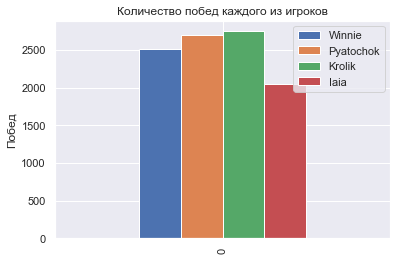

In [178]:
# Посчитаем количество побед каждого из игроков
WinnieWins = np.count_nonzero(winner == 0)
PyatochokWins = np.count_nonzero(winner == 1)
KrolikWins = np.count_nonzero(winner == 2)
IaiaWins = np.count_nonzero(winner == 3)

# wins = [WinnieWins, PyatochokWins, KrolikWins, IaiaWins]
# Создадим словарь из 4 значений: количества побед каждого из игроков
CountWins = {'Winnie' : [WinnieWins],
             'Pyatochok' : [PyatochokWins],
             'Krolik' : [KrolikWins],
             'Iaia' : [IaiaWins]}

# Изменим тип переменной со словаря на DataFrame
CountWins = pd.DataFrame.from_dict(CountWins)

# Проверим результат
print(CountWins)

# Построим столбчатую диаграмму - на вертикальной оси - количество побед из 10**4 марафонов (экспериментов):
CountWins.plot.bar()
plt.title('Количество побед каждого из игроков')
plt.ylabel('Побед')

Выводы:
1. Numpy быстрый (в отличие от циклов), красивый и удобный :)
2. На большой выборке наблюдений заметно, что Кролик, который имел распределение Пуассона победил
3. Худший результат показал Иа-Иа с распределением Бернулли

Возможно, наше упрощение о выборе единственным победителем при равенстве расстояний того игрока, индекс которого идет раньше, могло повлиять на результат, но несущественно (вероятность, что первые два непрерывных распределения попадут в заданную точку стремится к нулю), единственная проблема - совпадение дискретных распределений, которые имели Кролик и Иа-Иа.

Но все же мой guess в том, что на большом количестве испытаний значимость таких событий будет будет минимальна, потому наши итоговые данные должны корректно отображать действительность

### 2. Марафон. Задача 2

In [3]:
# Импортируем библиотеки для выполнения задания
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# Пусть количество часов марафона равно 10, т.к. нет других предпосылок
N = 10

# Создадим пустую матрицу
matrix = np.array([])

# Создадим зерно распределения
np.random.seed(18)

# Сгенерируем то, сколько каждая команда пройдет за каждый час в каждом марафоне
Winnie_Pyatochok = np.random.exponential(1, size=2*N*(10**4)) + np.random.normal(1, 1, size=2*N*(10**4))
Krolik_Iaia = np.random.poisson(1, size=2*N*(10**4)) + np.random.binomial(n=2, p=0.5, size=2*N*(10**4))


# Добавим все распределения в один массив, а затем изменим размерность до нужной нам:
# Все наблюдения за N часов в каждом из 10**4 марафонов по 2 командам
matrix = np.concatenate((Winnie_Pyatochok, Krolik_Iaia))
matrix = matrix.reshape(2*10**4, N, 2, order='F')

# Посмотрим сгенерированные случайные величины
print(Winnie_Pyatochok)
print(Krolik_Iaia)

# Проверим, верно ли мы выбрали размерность матрицы
print(matrix[:2])

[1.65898555 3.20947465 2.85387593 ... 3.57315275 3.2341992  2.2015533 ]
[0 1 2 ... 2 2 3]
[[[ 1.65898555  0.        ]
  [ 1.86766899  2.        ]
  [ 1.3391313   0.        ]
  [ 1.18676134  2.        ]
  [ 1.07639596  1.        ]
  [ 1.69259536  0.        ]
  [ 2.56109611  0.        ]
  [ 1.11152189  0.        ]
  [ 3.0188299   2.        ]
  [ 1.67312009  1.        ]]

 [[ 3.20947465  1.        ]
  [ 1.04457362  5.        ]
  [ 2.68901946  2.        ]
  [-0.1761872   3.        ]
  [ 3.08357098  2.        ]
  [ 3.97299808  2.        ]
  [ 1.74287041  5.        ]
  [ 5.1943773   2.        ]
  [ 0.2303372   3.        ]
  [ 3.39326409  2.        ]]]


In [6]:
# Просуммируем результаты всех часов по каждому игроку по каждому марафону
results = np.sum(matrix, axis=1)

# Проверим корректность отображения данных
print(results)

[[17.1861065   8.        ]
 [24.38429859 27.        ]
 [28.13989795 21.        ]
 ...
 [25.92480367 23.        ]
 [18.61599941 27.        ]
 [21.8797632  24.        ]]


In [7]:
# Создадим вектор-столбец с инндексами победителей
# 0 - команда Винни и Пятачка, 1 - команда Кролика и Иа-Иа
winner = np.argmax(results, axis=1)
print(winner)

[0 1 0 ... 0 1 1]


   Winnie_Pyatochok  Krolik_Iaia
0              9960        10040


Text(0, 0.5, 'Побед')

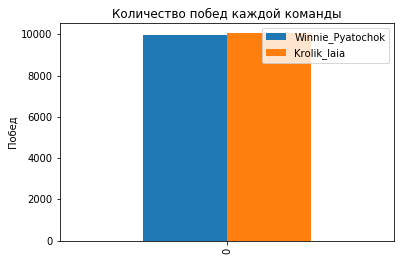

In [8]:
# Посчитаем количество побед каждого из игроков
Winnie_Pyatochok_Wins = np.count_nonzero(winner == 0)
Krolik_Iaia_Wins = np.count_nonzero(winner == 1)

# wins = [WinnieWins, PyatochokWins, KrolikWins, IaiaWins]
# Создадим словарь из 4 значений: количества побед каждого из игроков
CountWins = {'Winnie_Pyatochok' : [Winnie_Pyatochok_Wins],
             'Krolik_Iaia' : [Krolik_Iaia_Wins]}

# Изменим тип переменной со словаря на DataFrame
CountWins = pd.DataFrame.from_dict(CountWins)

# Проверим результат
print(CountWins)

# Построим столбчатую диаграмму - на вертикальной оси - количество побед из 10**4 марафонов (экспериментов):
CountWins.plot.bar()
plt.title('Количество побед каждой команды')
plt.ylabel('Побед')

Полученные результаты вполне логичны: объединение лидера и аутсайдера привело в сумме к результату, близкому к сумме двух участников, которые по результатам были посередине

В конце концов, используя common sense можно сделать вывод, что Кролик и Осел в среднем быстрее, чем Медведь и Свинья)))))

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [1]:
# Испортируем необходимые библиотеки
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import time
import pandas as pd

def parse_page(search: str, page: int):

    # Преобразуем аргумент в строчный формат, т.к. он нужен для создания url
    page = str(page)
    # Необходимо для отработки словосочетаний    
    search.replace(" ", "+")
    
    # Не уверен, что это нужно, но пусть будет задержка между запросами, на случай, если эту функцию будем использовать
    # несколько раз
    time.sleep(10)

    # Ссылка на основную страницу авито
    url = 'https://www.avito.ru/moskva'

    # Зададим необходимые параметры поиска и страницу поиска
    search = '?q=' + search
    page = '&p=' + page
    
    # Создали ссылку для необходимого поиска
    if page == 1:
        url = url + search
    else:
        url = url + search + page

    # Получили страницу, использовали user-agent, чтобы реже получать блокировки
    response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
    
    # Используем beautifulsoup для удобной навигации по html коду
    tree = BeautifulSoup(response.content, 'html.parser')
    

    
    # Начинаем вытаскивать данные:     
    
    # Спарсим название объявления
    names = tree.find_all('a', {'class' : 'snippet-link'})
    names = [name.text for name in names]
    
    # Спарсим ссылку на объявление
    links = tree.find_all('div', {'class' : 'snippet-title-row'})
    links = [str(link) for link in links]
    links = ['https://www.avito.ru' + link[link.find('href')+6:link.find('itemprop')-1] for link in links]

    # Спарсим цену объявления
    prices = tree.find_all('span', {'class' : 'snippet-price'})
    prices = [price.text for price in prices]
    # Приведем цены к нужному формату
    prices = [price.replace('\n ', '') for price in prices]
    prices = [price.replace('\n  ', '') for price in prices]
    prices = [price.replace(' ', '') for price in prices]
    prices = [price.replace('₽', '') for price in prices]
    for i in range(len(prices)):
        try:
            prices[i] = int(prices[i])
        except:
            prices[i] = 'n/a'

    # Спарсим станции метро
    stations = tree.find_all('span', {'class' : 'item-address-georeferences-item__content'})
    stations = [station.text for station in stations]
    
    # Спарсим количество метров до метро
    metres = tree.find_all('div', {'itemprop' : 'address'})
    metres = [metre.text for metre in metres]
    metres = [str(metre) for metre in metres]
    
    for i in range(len(metres)):
        if metres[i].find(',') != -1:
            metres[i] = metres[i][metres[i].find(',')+1:]
        else:
            metres[i] = 'n/a'

    # Приведем к нужному формату
    metres = [metre.replace('\xa0', '') for metre in metres]
    metres = [metre.replace(' ', '') for metre in metres]
    metres = [metre.replace('км', '') for metre in metres]
    metres = [metre.replace('м', '') for metre in metres]
    metres = [metre.replace(',', '.') for metre in metres]

    for i in range(len(metres)):
        if metres[i] != 'n/a':
            metres[i] = float(metres[i])
            if metres[i] < 100:
                metres[i] = int(metres[i] * 1000)
            else:
                metres[i] = int(metres[i])
    
    # Сохраним всю полученную информацию в pandas dataframe
    list_of_parametres = [names, links, prices, stations, metres]
    df = pd.DataFrame(list_of_parametres)
    df = pd.DataFrame.transpose(df)
    df.columns = ('names', 'links', 'prices', 'stations', 'metres')
    
    # На выходе выведем полученный DataFrame  
    return df

In [396]:
# Спарсим данные написанной функцией 
df1 = parse_page('кофемолка', 1)

In [399]:
# На случай, если закрались строки с пропусками в данных
# Иначе может некорректно отображаться

df1.dropna()

,names,links,prices,stations,metres
0,Кофемашина,https://www.avito.ru/moskva/bytovaya_tehnika/k...,10990,Севастопольская,100
1,Кофемашина Krups,https://www.avito.ru/moskva/bytovaya_tehnika/k...,9990,Андроновка,800
2,Кофемашина,https://www.avito.ru/moskva/bytovaya_tehnika/k...,1400,Полянка,200
3,Настенная кофемолка,https://www.avito.ru/moskva/posuda_i_tovary_dl...,4500,Раменки,1500
4,Кофемолка / комемашина,https://www.avito.ru/moskva/bytovaya_tehnika/k...,10000,Сокольники,500
5,Кофемолка,https://www.avito.ru/moskva/posuda_i_tovary_dl...,1500,Павелецкая,n/a
6,Кофемолка электрическая,https://www.avito.ru/moskva/kollektsionirovani...,600,Курская,200
7,Кофемашина,https://www.avito.ru/moskva/bytovaya_tehnika/k...,1400,Полянка,200
8,Квартира (Таиланд),https://www.avito.ru/moskva/nedvizhimost_za_ru...,3000000,Охотный ряд,200
9,Готовый бизнес - атмосферное кафе в стиле Лофт,https://www.avito.ru/moskva/gotoviy_biznes/got...,1200000,Шоссе Энтузиастов,500


In [2]:
# Проверим еще разок для словосочетаний:)
df2 = parse_page('nintendo switch', 4)

In [3]:
df2.dropna()

,names,links,prices,stations,metres
0,Наушники Sony Playstation Platinum cechya-0090,https://www.avito.ru/moskva/igry_pristavki_i_p...,5000,Волоколамская,1000
1,MitinoGame,https://www.avito.ru/moskva/kollektsionirovani...,8000,Щукинская,100
2,Hotline Miami Nintendo Switch Exclusive Version,https://www.avito.ru/moskva/igry_pristavki_i_p...,26000,Динамо,n/a
3,Nintendo Switch 160GB прошитая Atmosphere Kefir,https://www.avito.ru/moskva/predlozheniya_uslu...,600,Савеловская,300
4,"Ремонт Джойстиков PS, XBox, Nintendo Wii, Switch",https://www.avito.ru/moskva/igry_pristavki_i_p...,5000,Рязанский проспект,2000
5,Игра для Nintendo switch,https://www.avito.ru/moskva/igry_pristavki_i_p...,18000,Багратионовская,400
6,Nintendo Switch lite + 3 крутые игры,https://www.avito.ru/moskva/igry_pristavki_i_p...,2500,Домодедовская,n/a
7,Diablo 3 Nintendo Switch свич,https://www.avito.ru/moskva/igry_pristavki_i_p...,29300,Волоколамская,900
8,PS4 PRO 1TB Новая,https://www.avito.ru/moskva/igry_pristavki_i_p...,21500,Волоколамская,700
9,"Приставки PS4 pro,slim есть доставка",https://www.avito.ru/moskva/igry_pristavki_i_p...,22000,Братиславская,600


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1

In [5]:
# Загрузим датасет в pandas формат
df = pd.read_csv('/Users/Alexey/Documents/GitHub/eds-spring-2020-hw2-AlexeySek/walmart.csv')

In [8]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [9]:
df.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [10]:
# Строки - количество наблюдений, столбцы - переменные
df.shape

(418239, 16)

In [11]:
# Посмотрим тип каждой переменной
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
Store           418239 non-null int64
Date            418239 non-null object
Dept            418239 non-null int64
Weekly_Sales    418239 non-null float64
IsHoliday       418239 non-null bool
Type            418239 non-null object
Size            418239 non-null int64
Temperature     418239 non-null float64
Fuel_Price      418239 non-null float64
MarkDown1       147484 non-null float64
MarkDown2       108144 non-null float64
MarkDown3       134568 non-null float64
MarkDown4       132315 non-null float64
MarkDown5       148182 non-null float64
CPI             418239 non-null float64
Unemployment    418239 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.3+ MB


In [156]:
# Приводим столбец дат к формату дат

df['Date'] = pd.to_datetime(df['Date'])

In [157]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


### 4.2

In [14]:
# Проверим количество нулей в каждом столбце
df.isna().sum() 

Store                0
Date                 0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270755
MarkDown2       310095
MarkDown3       283671
MarkDown4       285924
MarkDown5       270057
CPI                  0
Unemployment         0
dtype: int64

In [18]:
# Найдем долю пропущенных значений в каждой переменной
frac = df.isna().sum() / df.shape[0]

# Покажем в процентах (применили формат чисел ко всем столбцам)
# ЦИКЛ ТОЛЬКО ДЛЯ ТОГО ЧТОБЫ ПОМЕНЯТЬ ФОРМАТ НА ПРОЦЕНТЫ!!!
for i in range(len(frac)):
    print("{0:.2%}".format(frac[i]))

0.00%
0.00%
0.00%
0.00%
0.00%
0.00%
0.00%
0.00%
0.00%
64.74%
74.14%
67.83%
68.36%
64.57%
0.00%
0.00%


In [19]:
# Получим булевы значения по условию где нулевых значений больше 60%
nulls = df.isna().sum() / df.shape[0] > 0.6
nulls

Store           False
Date            False
Dept            False
Weekly_Sales    False
IsHoliday       False
Type            False
Size            False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
dtype: bool

In [20]:
# Найдем номера переменных, где нулевых значений больше 60%
droplist = []
for i in range(len(nulls)):
    if nulls[i] == True:
        droplist.append(i)

droplist

[9, 10, 11, 12, 13]

In [21]:
# Выкинули все столбцы где нулевых значений больше 60%
# Создадим новый df1, чтобы не трогать исходные данные
df1 = df.drop(df.columns[droplist], axis='columns')
df1.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


### 4.3

In [22]:
# Найдем количество уникальных магазинов
stores = set(df1['Store'])
len(stores)

45

In [23]:
# Найдем количество уникальных отделов
depts = set(df1['Dept'])
len(depts)

81

In [24]:
# Посмотрим, сколько дней в периоде из датасета
# Также посмотрим дату начала периода и окончания периода

maxDate = max(df['Date'])
minDate = min(df['Date'])
period = pd.Timedelta(maxDate - minDate)
print(period)
print(minDate, maxDate)

987 days 00:00:00
2010-02-05 00:00:00 2012-10-19 00:00:00


### 4.4

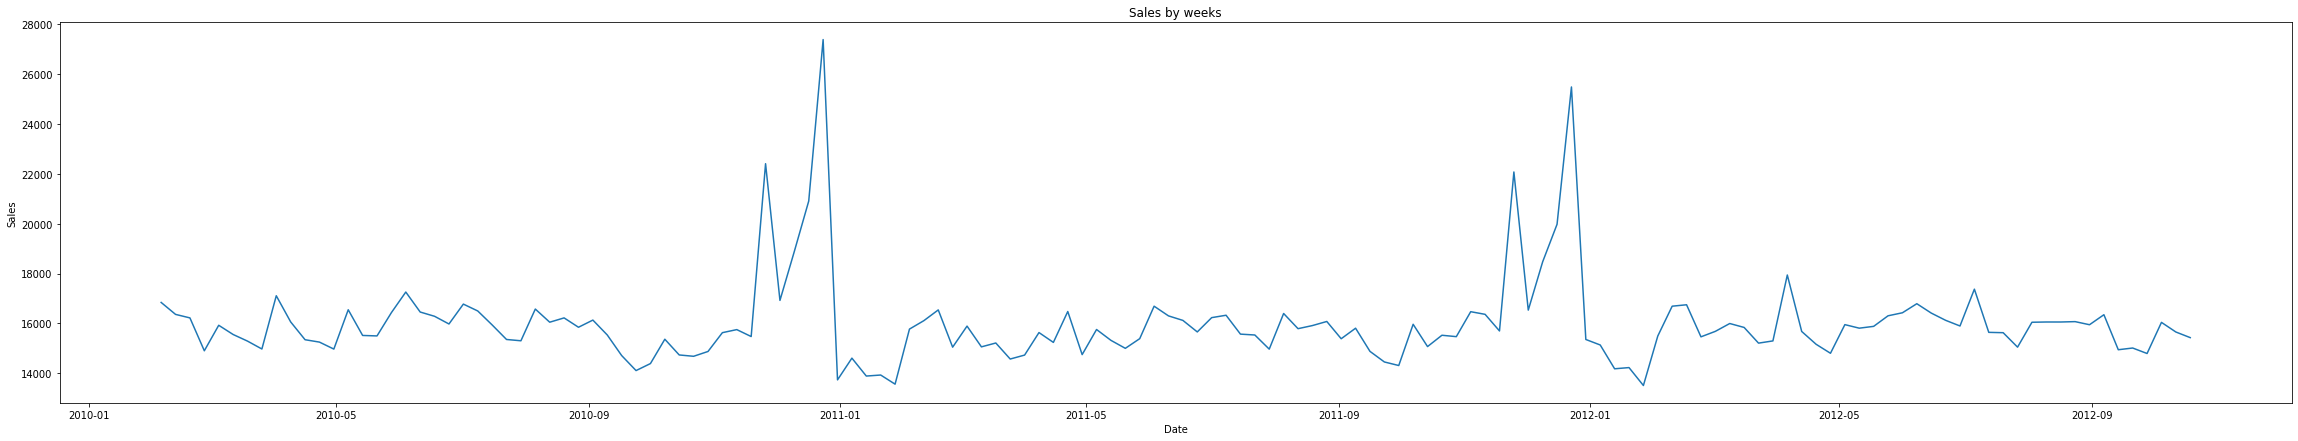

In [55]:
# Построим график продаж всей сети по датам
# Добавим название графика и подписи для осей, также изменим размер, чтобы даты не наезжали друг на друга

# df1.plot(x='Date', y='Weekly_Sales', color='r')
fig, ax = plt.subplots(figsize=(40,7))
sns.lineplot(ax=ax, x='Date', y='Weekly_Sales', ci=None, data=df1)
plt.title('Sales by weeks')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### 4.5

In [85]:
# Оставим только столбцы с числовыми значениями

df2 = df1.drop(df.columns[[0, 1, 2, 4, 5]], axis='columns')

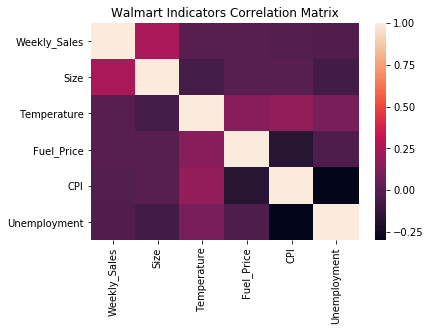

In [98]:
# Построим необходимую нам корреляционную матрицу для числовых показателей

sns.heatmap(df2.corr())
plt.title('Walmart Indicators Correlation Matrix')

plt.show()

### 4.6

Text(0.5, 1.0, 'Top5 Stores Sales by Weeks')

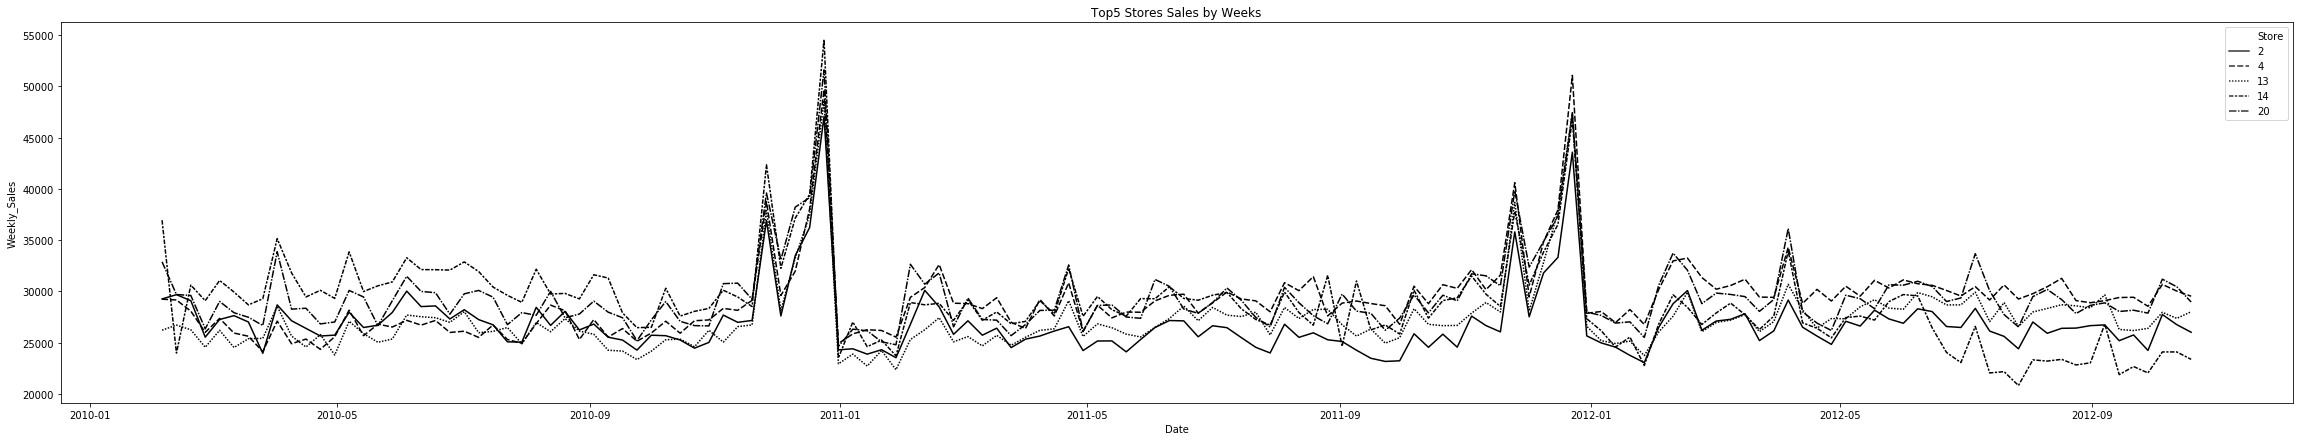

In [149]:
# Сгруппируем и просуммируем продажи по магазинам
# Отсортируем в порядке убывания и возьмем топ5 магазинов

df3 = df1.groupby('Store').sum()
df3 = pd.DataFrame.sort_values(df3, by='Weekly_Sales', axis=0, ascending=False)
df3 = df3.head(5)
indexes = list(df3.index)

# Вытащим временные ряды только по топ5 магазинов
df_top5 = df1[df1['Store'].isin(indexes)]


# Построим график и сделаем подписи
fig, ax = plt.subplots(figsize=(40,7))
sns.lineplot(ax=ax, x="Date", y="Weekly_Sales", style="Store", ci=None, color='k',data=df_top5)
plt.title('Top5 Stores Sales by Weeks')

### 4.7

In [163]:
# Сделаем слайс только типа А и только за 2011 год
df1.set_index('Date', inplace=True)

df_top10 = df1[df1['Type'].isin(['A'])]
df_top10 = df_top10.loc['2011-01-01':'2011-12-31']

In [165]:
# Вытащим топ10 отделов по продажам за 2011 типа А
df_top10 = df_top10.groupby('Dept').sum()
df_top10 = pd.DataFrame.sort_values(df_top10, by='Weekly_Sales', axis=0, ascending=False)

df_top10 = df_top10.head(10)
df_top10

,Store,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment
Dept,,,,,,,,
92,25428,1.290298e+08,88.0,202771400,67870.73,4061.988,199544.799502,9012.693
95,25428,1.101521e+08,88.0,202771400,67870.73,4061.988,199544.799502,9012.693
90,25428,8.260279e+07,88.0,202771400,67870.73,4061.988,199544.799502,9012.693
38,25428,7.463045e+07,88.0,202771400,67870.73,4061.988,199544.799502,9012.693
72,21942,6.697997e+07,80.0,198751490,60531.00,3701.153,182156.317291,8171.453
91,25428,6.146740e+07,88.0,202771400,67870.73,4061.988,199544.799502,9012.693
40,25428,6.057080e+07,88.0,202771400,67870.73,4061.988,199544.799502,9012.693
2,25428,5.947513e+07,88.0,202771400,67870.73,4061.988,199544.799502,9012.693
94,25428,5.827561e+07,88.0,202771400,67870.73,4061.988,199544.799502,9012.693


Text(0.5, 0, 'Id of Dept')

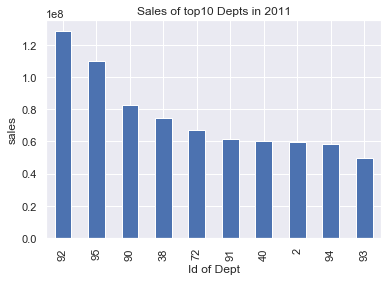

In [185]:
# Построим столбчатую диаграмму
sns.set()
df_top10['Weekly_Sales'].plot.bar()
plt.title('Sales of top10 Depts in 2011')
plt.ylabel('sales')
plt.xlabel('Id of Dept')

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [6]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 5.1

In [2]:
# https://oauth.vk.com/blank.html#access_token=5c42689d40d1a740f14cc4fbf854a87a875e48ec94873dd9c91a0d2d9bc87a8611c72d86f9f9ba0489121&expires_in=86400&user_id=202125167

# мой номер странички
myid = '202125167'  # вставить номер странички

# версия используемого API
version = '5.103' 


# С токеном не стал заморачиваться, потому что это аккаунт, которым не пользуюсь :)
# подгружаем токен из файлика на компьютере
token = '5c42689d40d1a740f14cc4fbf854a87a875e48ec94873dd9c91a0d2d9bc87a8611c72d86f9f9ba0489121'

In [3]:
def vk_download(method, parameters):
    
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

In [16]:
group_id = 'dealfinder'

In [24]:
# Вытащим из группы thevillage id 1000 участников
import time
members = []

for i in range(20):
    x = vk_download('groups.getMembers', 'group_id={}&count=1000'.format(group_id))
    x = x.get('response')
    x = x.get('items')
    for element in x:
        members.append(element)
    time.sleep(0.4)

members[:5]

# Сделал не функцией, а циклом

[1359, 3450, 4051, 4270, 9182]

20000 id -> 20000 дней рождения / пропусков

In [26]:
# Вытащим из группы дни рождения по id
import time

bdays = []
for i in range(len(members)):
    
    time.sleep(0.4)
    
    try:
        bdays.append(vk_download('users.get', 'user_ids={}'.format(members[i]) + '&' + 'fields={}'.format('bdate')))
    except:
        next

In [27]:
# Проверим что все нормально спарсилось
bdays[:5]

[{'response': [{'id': 1359,
    'first_name': 'Анна',
    'last_name': 'Нейса',
    'is_closed': False,
    'can_access_closed': True,
    'bdate': '31.12'}]},
 {'response': [{'id': 3450,
    'first_name': 'Евгений',
    'last_name': 'Литвинов',
    'is_closed': False,
    'can_access_closed': True,
    'bdate': '11.12'}]},
 {'response': [{'id': 4051,
    'first_name': 'Руслан',
    'last_name': 'Сергеевич',
    'is_closed': False,
    'can_access_closed': True}]},
 {'response': [{'id': 4270,
    'first_name': 'Евгений',
    'last_name': 'Хомченко',
    'is_closed': True,
    'can_access_closed': False}]},
 {'response': [{'id': 9182,
    'first_name': 'Денис',
    'last_name': 'Шолохов',
    'is_closed': False,
    'can_access_closed': True}]}]

In [28]:
# Продолжаем вытаскивать дни рождения
bdays1 = []
for bday in bdays:
    bdays1.append(bday.get('response'))

In [29]:
# Продолжаем вытаскивать дни рождения
dates = []
for bday in bdays1:
    date = bday[0].get('bdate')
    if date == '':
        dates.append('N/A')
    else:
        dates.append(date)

# Конечно, максимально неэффективно, но зато работает ))
newdates = []
for date in dates:
    if date != None:
        if date.count('.') > 1:
            newdates.append(date[:date.rfind('.')])
        else:
            newdates.append(date)
    else:
        newdates.append(None)
            
newdates[:10]


['31.12', '11.12', None, None, None, '11.11', '26.2', None, None, '20.1']

In [30]:
# Сделаем для удобства колонки с днями и месяцами отдельно
months = []
days = []

for date in newdates:
    if date != None:
        months.append(date[date.find('.')+1:])
        days.append(date[:date.find('.')])
    else:
        months.append(None)
        days.append(None)

### 5.2

In [31]:
# Сделаем DataFrame из ID в индексах и Датами рождения
df_bdates = pd.DataFrame(newdates, members)
df_bdates['Day'] = days
df_bdates['Month'] = months
df_bdates_no_none = df_bdates.dropna()
df_bdates_no_none[:10]

,0,Day,Month
1359,31.12,31,12
3450,11.12,11,12
14605,11.11,11,11
16743,26.2,26,2
24394,20.1,20,1
24956,15.11,15,11
33712,19.8,19,8
34441,18.12,18,12
39616,2.6,2,6
41540,28.1,28,1


### 5.3

Text(0, 0.5, 'Количество человек')

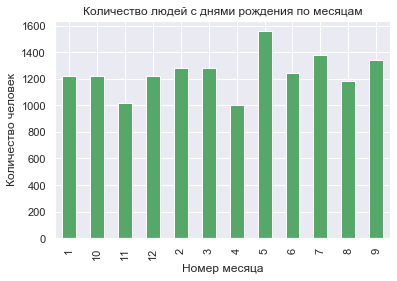

In [32]:
# Посчитаем количество в каждом месяце
sns.set()
df_for_plot = df_bdates_no_none.groupby('Month').count()
df_for_plot['Day'].plot.bar(color='g')
plt.title('Количество людей с днями рождения по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество человек')

# Не стал сортировать месяца в нормальном порядке, т.к. нам важен не порядок, а то, что распределение не равномерное

Вывод: дни рождения распределены по месяцам неравномерно

### 5.4

In [33]:
# Проведем наш эксперимент 200 раз

N = 200
coincidences = 0
B = 50

# Если хотя бы 1 раз есть совпадение - добавляем в счетчик
for i in range(N):
    sample = pd.DataFrame.sample(df_bdates_no_none, n=50)
    A = sample.groupby(0).count()['Day'].count()
    if B - A != 0:
        coincidences += 1

coincidences

197

In [34]:
# Эмпирическая вероятность совпадения

empirical_p = coincidences / N

'{:.2%}'.format(empirical_p)

'98.50%'

Вывод: эмпирическая вероятность очень близка к теоретической, несмотря на неравномерное распределение дней рождения по месяцам. Вероятно, это происходит из-за большого числа испытаний